In [2]:
pwd

'/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies/individuals/arthur'

In [3]:
cd ../..

/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies


In [42]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
from tools.data_preparation import *

In [43]:
df = merge_imdb_top_crew()

In [63]:
#filtered data set for the top 5 genres
filt_df = df[(df['genres'] == 'Action') |
             (df['genres'] == 'Adventure') |
             (df['genres'] == 'Sci-Fi') |
             (df['genres'] == 'Fantasy') |
             (df['genres'] == 'Animation')]

#filtered data set for directors only
filt_df = df[(df['category'] == 'director')]

In [47]:
#de-depe on movie constant (tconst) so that each row is one movie
dedup_df = filt_df.drop_duplicates(subset='tconst')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
79674,tt5813916,The Mountain II,Dag II,2016,135.0,Action,9.3,100568,5,nm3809021,director,NaN,NaN,Alper Caglar,NaN,NaN,"producer,writer,editor","tt2471640,tt3345952,tt5813916,tt8197998"
50095,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,Action,8.8,441135,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
50092,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
12941,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,Action,8.5,210869,7,nm0745247,director,NaN,NaN,Rodney Rothman,NaN,NaN,"writer,producer,director","tt2294449,tt0800039,tt3960412,tt4633694"
98842,tt5074352,Dangal,Dangal,2016,161.0,Action,8.5,123638,5,nm4318159,director,NaN,NaN,Nitesh Tiwari,NaN,NaN,"writer,director,music_department","tt6967980,tt1841542,tt3531852,tt5074352"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,tt1617661,Jupiter Ascending,Jupiter Ascending,2015,127.0,Action,5.3,166327,5,nm0905154,director,NaN,NaN,Lana Wachowski,1965.0,NaN,"writer,producer,director","tt1371111,tt0234215,tt0133093,tt0115736"
15431,tt1289401,Ghostbusters,Ghostbusters,2016,116.0,Action,5.2,186788,5,nm0082450,director,NaN,NaN,Paul Feig,1962.0,NaN,"actor,producer,director","tt3079380,tt0193676,tt2404463,tt1289401"
32445,tt1628841,Independence Day: Resurgence,Independence Day: Resurgence,2016,120.0,Action,5.2,155344,5,nm0000386,director,NaN,NaN,Roland Emmerich,1955.0,NaN,"writer,producer,director","tt1628841,tt0319262,tt0120685,tt0116629"
19455,tt3371366,Transformers: The Last Knight,Transformers: The Last Knight,2017,154.0,Action,5.2,119007,5,nm0000881,director,NaN,NaN,Michael Bay,1965.0,NaN,"producer,director,actor","tt2109248,tt1055369,tt0117500,tt0120591"


In [60]:
#sort the movies by number of votes first and then average rating
dedup_df.sort_values(by=['numvotes', 'averagerating'], ascending=[False, False],inplace=True)

#reset the index
dedup_df= dedup_df.reset_index()
#drop the previous index column
dedup_df.drop(columns='index', inplace=True)

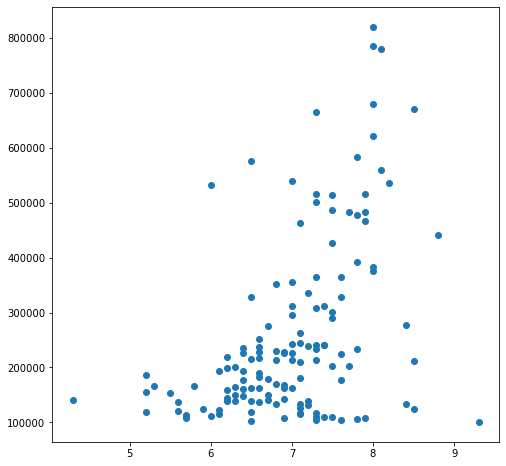

In [62]:
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(x=dedup_df['averagerating'],
           y=dedup_df['numvotes'])

In [57]:
#find the top five movies and get the tconsts
top_five_df = dedup_df.head(5)
top_five_tconst_df = top_five_df['tconst'].to_frame()

#merge the top five movie tconsts to the original data that was not de-dupe
top_direct_df = pd.merge(top_five_tconst_df, filt_df, on='tconst', how='inner')

#de-dupe by tconst and primary_name 
top_direct_df.drop_duplicates(subset=['tconst', 'primary_name'], inplace=True)
top_direct_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt1431045,Deadpool,Deadpool,2016,108.0,Action,8.0,820847,5,nm1783265,director,NaN,NaN,Tim Miller,NaN,NaN,"director,writer,visual_effects","tt9561862,tt0425410,tt1431045,tt1981115"
2,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,Action,8.0,784780,5,nm0009190,director,NaN,NaN,J.J. Abrams,1966.0,NaN,"producer,writer,music_department","tt0411008,tt0796366,tt1650062,tt2488496"
5,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,Action,8.1,780910,5,nm0004306,director,NaN,NaN,George Miller,1945.0,NaN,"producer,writer,director","tt1392190,tt0079501,tt0082694,tt0366548"
8,tt3659388,The Martian,The Martian,2015,144.0,Adventure,8.0,680116,5,nm0000631,director,NaN,NaN,Ridley Scott,1937.0,NaN,"producer,director,production_designer","tt3659388,tt0083658,tt0172495,tt0103074"
10,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
13,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,6,nm0751648,director,NaN,NaN,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
